# **Encoding & Scaling**

---



## 데이터 전처리 (Data Preprocessing)


모든 알고리즘은 데이터 기반, 따라서 어떤 데이터를 입력으로 가지느냐에 따라 결과도 크게 달라질 수 있음
 >Garbage In, Garbage Out

#### Null 값은 어떻게 처리?
-  (단순히 평균값 대체 X) 해당 피처의 중요도가 높다면 피처의 평균으로 대처할 경우 왜곡 심할 수 있음

-> 업무 로직 등 상세히 검토해 더 정밀한 대체값 선정


사이킷런의 머신러닝 알고리즘은 문자열 값을 입력값으로 허용하지 않음

->  문자형 값은 인코딩 후 숫자 형으로 변환
 (불필요한 피처라고 생각되면 삭제하는 게 더 좋음)

## 데이터 인코딩

### 레이블 인코딩(Label encoding)
- 카테고리 피처 -> 코드형 숫자 값

 ex) 상품 데이터 TV, 냉장고, 전자레인지, 컴퓨터

 -> TV : 1 , 냉장고 : 2 전자레인지 : 3, 컴퓨터 : 4

### 원-핫 인코딩(One Hot encoding)
- 피처 값의 유형에 따라 새로운 피처 추가, 고유 값에 해당하는 컬럼에만 1 표시 /  나머지 컬럼 0 표시

### 빈도인코딩 Frequency Encoding
### SVD 잠재 의미 분석하는 인코딩

---



In [1]:
from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고','전자레인지','노트북','선풍기','선풍기','믹서기','믹서기']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 5 2 4 4 3 3]


In [2]:
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '노트북' '믹서기' '선풍기' '전자레인지']


In [3]:
# 다시 디코딩

print('디코딩 원본값:',encoder.inverse_transform([4,5,2,0,1,1,3,3,2,4,4,4,4,4,4]))

디코딩 원본값: ['선풍기' '전자레인지' '노트북' 'TV' '냉장고' '냉장고' '믹서기' '믹서기' '노트북' '선풍기' '선풍기' '선풍기'
 '선풍기' '선풍기' '선풍기']


### 주의할 점
- 레이블 인코딩은 간단하게 문자열 값 -> 숫자형 카테고리 값
- 하지만 레이블 인코딩이 일괄적인 숫자 값으로 변환이 되면서 몇몇 ML 알고리즘에는 이를 적용할 경우 예측 성능 떨어지는 경우 발생

- 숫자 값에 따른 순서나 중요도로 인식이 될 수 있음, 이런 특성 때문에 레이블 인코딩은 선형회귀와 같은 ML알고리즘에는 적용하지 않아야 함
- 트리 계열의 ML알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 레이블 인코딩 별문제 없음

### 원-핫 인코딩 (레이블 인코딩 문제점을 해결하기 위한 인코딩 방식)


원-핫 (여러 개의 속성 중 단 한 개의 속성만 1로 표시)

In [6]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서기','믹서기']

# 2차원 ndarray로 변환
items = np.array(items).reshape(-1,1)

# 원-핫 인코딩을 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

# OneHotEncoder로 변환한 결과: 희소행렬 -> toarray() 이용해 밀집 행렬로 변환
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


- 컬럼이 items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서기','믹서기'] 로 매칭
- 변환된 데이터의 첫 번째 레코드의 첫 번째 레코드의 첫 번째 컬럼이 1이고 나머지는 모두 0

In [7]:
import pandas as pd

In [8]:
df_1 = pd.DataFrame({'이름':['홍길동','김영희','김철수','박철수','오철수','정철수','정철수','배철수']})

In [9]:
df_1

,이름
0,홍길동
1,김영희
2,김철수
3,박철수
4,오철수
5,정철수
6,정철수
7,배철수


In [10]:
pd.get_dummies(df_1) # 원핫인코딩 바로 사용 가능

,이름_김영희,이름_김철수,이름_박철수,이름_배철수,이름_오철수,이름_정철수,이름_홍길동
0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0
5,0,0,0,0,0,1,0
6,0,0,0,0,0,1,0
7,0,0,0,1,0,0,0


In [11]:
import seaborn as sns
df = sns.load_dataset('titanic')

In [12]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [13]:
df_sns = df[['sex','embarked','class']]

In [14]:
df_1 = pd.get_dummies(df_sns)

In [15]:
df_1 = df_1*1

In [18]:
df_tt = pd.concat([df,df_1],axis=1)

In [19]:
df_tt

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,alive,alone,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,no,False,0,1,0,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,yes,False,1,0,1,0,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,yes,True,1,0,0,0,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,yes,False,1,0,0,0,1,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,no,True,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,...,no,True,0,1,0,0,1,0,1,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,...,yes,True,1,0,0,0,1,1,0,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,...,no,False,1,0,0,0,1,0,0,1
889,1,1,male,26.0,0,0,30.0000,C,First,man,...,yes,True,0,1,1,0,0,1,0,0


In [20]:
df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서기','믹서기']})

pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서기,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### **피처 스케일링(feature scaling)**
### **표준화(Standardization), 정규화(Normalization)**

- 표준화 : 데이터의 피처 각각이 평균 0, 분산 1인 가우시안 정규 분포를 가진 값으로 변환
- 새로운 x의 값 = (x의 평균을 뺀 값) % (피처 x의 표준편차)

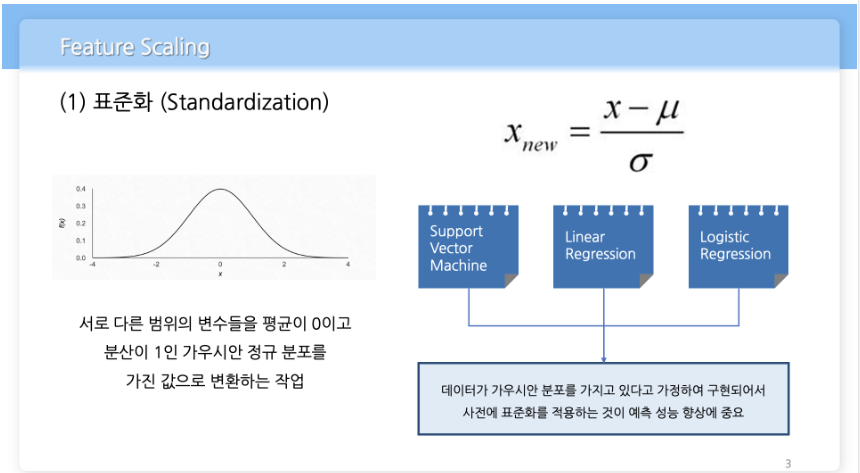

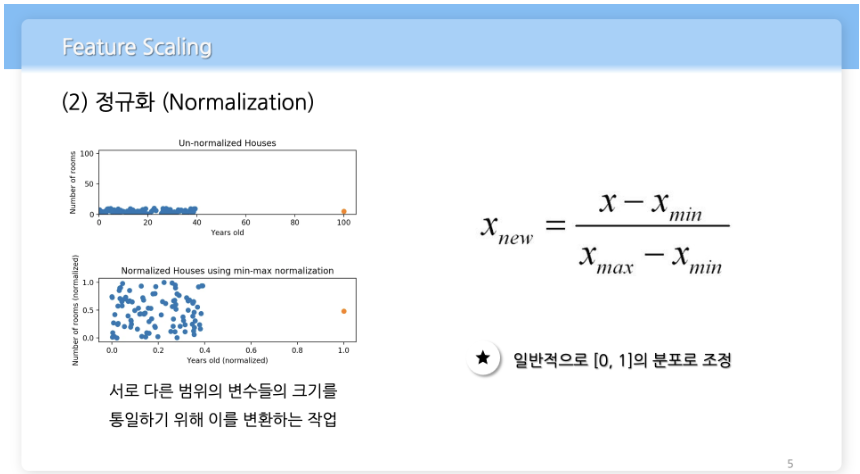

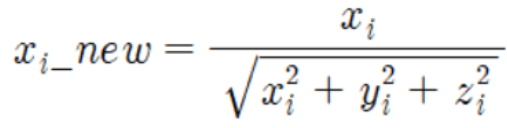

In [ ]:
Image('벡터정규화예시사진.png')

## StandardScaler
표준화를 쉽게 지원하기 위한 클래스
(개별 피처를 평균 0, 분산 1인 값으로 변환)


가우시안 정규 분포를 가질 수 있도록 데이터 변환하는 것
- 사이킷런 RBF 커널 SVM, 선형회귀, 로지스틱 회귀는 데이터가 가우신 반포 가정, 표준화를 적용하는 것은 예측 성능 향상에 중요한 요소

In [21]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature들의 평균 값')
print(iris_df.mean())
print('\nfeature들의 분산 값')
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [22]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()

scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


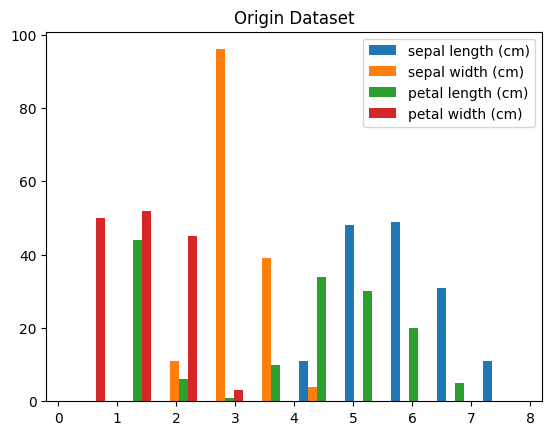

In [24]:
iris_df_standarded = (iris_df - iris_df.mean()) / iris_df.std()

plt.title('Origin Dataset')
plt.hist(iris_df)
plt.legend(iris_df.columns)

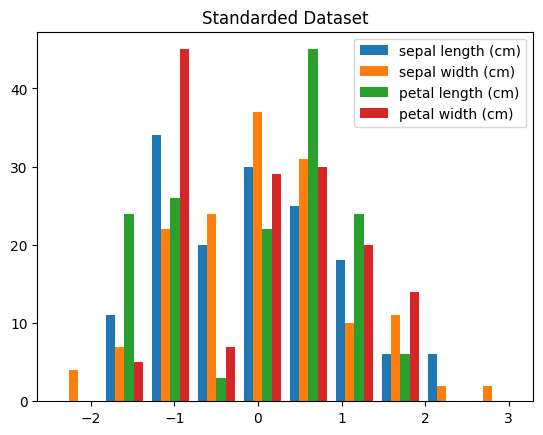

In [25]:
plt.title('Standarded Dataset')
plt.hist(iris_df_standarded)
plt.legend(iris_df_scaled.columns)

### MinMaxScaler
데이터 값을 0 ~ 1 범위 값으로 변환 (음수 값이면 -1에서 1값으로 변환)

데이터 분포가 가우시안 분포가 아닌 경우에 Min,Max Scale 적용

분류보다 회귀에 유용

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


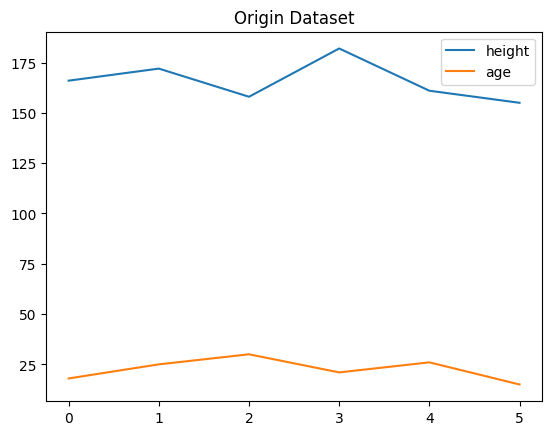

In [27]:
df = pd.DataFrame([[166, 18],
                  [172, 25],
                  [158, 30],
                  [182, 21],
                  [161, 26],
                  [155, 15]])
df.columns = ['height', 'age']
df_new = (df - df.min())/(df.max() - df.min())

plt.title('Origin Dataset')
plt.plot(df)
plt.legend(df.columns)

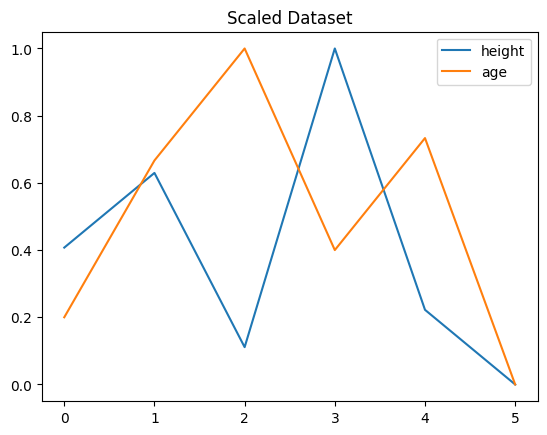

In [28]:
plt.title('Scaled Dataset')
plt.plot(df_new)
plt.legend(df_new.columns)

# MaxAbsScaler()
각 특성의 절대값 0 ~ 1 되도록 스케일링

모든 값은 -1 ~ 1로 표현, 데이터가 양수일 경우 MinMaxScaler 와 같음

이상치에 매우 민감

In [29]:
from sklearn.preprocessing import MaxAbsScaler

maxabs_scaler = MaxAbsScaler()

maxabs_scaler.fit(iris_df)

iris_scaled = maxabs_scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.544304
sepal width (cm)     0.454545
petal length (cm)    0.144928
petal width (cm)     0.040000
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


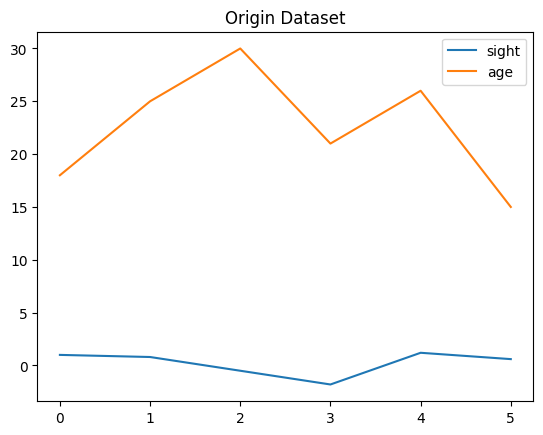

In [30]:
df = pd.DataFrame([[1.0, 18],
                  [0.8, 25],
                  [-0.5, 30],
                  [-1.8, 21],
                  [1.2, 26],
                  [0.6, 15]])
df.columns = ['sight', 'age']
df_new = df/df.abs().max()

plt.title('Origin Dataset')
plt.plot(df)
plt.legend(df.columns)

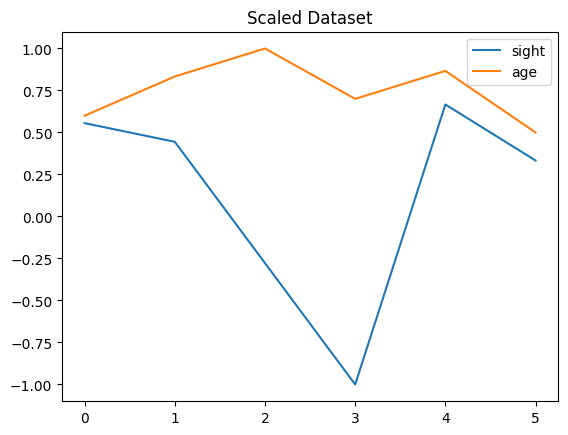

In [31]:
plt.title('Scaled Dataset')
plt.plot(df_new)
plt.legend(df_new.columns)

### RobustScaler()
평균, 분산 대신 중간값 & 사분위값 사용
- 중간값: 정렬시 중간에 있는 값
- 사분위값: 1/4, 3/4에 위치한 값
이상치 영향 최소화 가능

In [32]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

robust_scaler.fit(iris_df)

iris_scaled = robust_scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)   -1.153846
sepal width (cm)    -2.000000
petal length (cm)   -0.957143
petal width (cm)    -0.800000
dtype: float64

feature들의 최댓값
sepal length (cm)    1.615385
sepal width (cm)     2.800000
petal length (cm)    0.728571
petal width (cm)     0.800000
dtype: float64


In [33]:
df[['pclass','fare']]

KeyError: "None of [Index(['pclass', 'fare'], dtype='object')] are in the [columns]"

In [34]:
df

,sight,age
0,1.0,18
1,0.8,25
2,-0.5,30
3,-1.8,21
4,1.2,26
5,0.6,15


### Normalizer()
각 샘플(행)마다 적용되는 방식

한 행의 모든 특성들 사이의 유클리드 거리(L2 norm)가 1이 되도록 스케일링

일반적인 데이터 전처리의 상황에서 사용되는 것 X, 모델(특히 딥러닝) 내 학습 벡터에 적용,특히 피쳐들이 다른 단위(키, 나이, 소득 등)라면 더더욱 사용하지 않음

In [35]:
from sklearn.preprocessing import Normalizer

normal_scaler = Normalizer()

normal_scaler.fit(iris_df)

X_train_scaled = normal_scaler.transform(iris_df)
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)   -1.153846
sepal width (cm)    -2.000000
petal length (cm)   -0.957143
petal width (cm)    -0.800000
dtype: float64

feature들의 최댓값
sepal length (cm)    1.615385
sepal width (cm)     2.800000
petal length (cm)    0.728571
petal width (cm)     0.800000
dtype: float64


### feature_selection
만든 피처를 선택

상관계수, y값에 따라 볼 수 있음 (통계적 등 기타 방법 존재)

0,1 이진분류로 진행했을 때 간단한 threshold를 가지고 피처를 선택할 수 있는 방법 진행 예정

In [36]:
from sklearn.feature_selection import VarianceThreshold

X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

In [37]:
X

[[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]

In [38]:
df_tt = df_tt[['survived','sex_female','sex_male','embarked_C','embarked_Q','embarked_S','class_First','class_Second','class_Third']]

In [39]:
sel = VarianceThreshold(threshold=(0.8))

In [40]:
sel.fit_transform(df_tt)

ValueError: No feature in X meets the variance threshold 0.80000

In [41]:
sel = VarianceThreshold(threshold=(0.5))

In [42]:
sel.fit_transform(df_tt)

ValueError: No feature in X meets the variance threshold 0.50000

In [47]:
sel = VarianceThreshold(threshold=(0.2))

In [44]:
df_tt_ft = df_tt[['survived','sex_female','sex_male','embarked_S','class_Third']]

In [48]:
df_tt_ft = sel.fit_transform(df_tt)

In [49]:
sel.get_params

<bound method BaseEstimator.get_params of VarianceThreshold(threshold=0.2)>

In [50]:
sel.get_support

<bound method SelectorMixin.get_support of VarianceThreshold(threshold=0.2)>

In [51]:
sel.get_feature_names_out

<bound method SelectorMixin.get_feature_names_out of VarianceThreshold(threshold=0.2)>

In [52]:
sel.feature_names_in_

array(['survived', 'sex_female', 'sex_male', 'embarked_C', 'embarked_Q',
       'embarked_S', 'class_First', 'class_Second', 'class_Third'],
      dtype=object)

In [53]:
sel.n_features_in_

9

#### feature selection 통해 간단한 성능 비교

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [55]:
dt_clf = DecisionTreeClassifier(random_state=111)


In [58]:
df_tt_x = df_tt[[ 'sex_female', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S', 'class_First', 'class_Second', 'class_Third']]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(df_tt_x, df_tt['survived'], test_size=0.3, random_state=111)

In [60]:
# 학습
dt_clf = dt_clf.fit(X_train, y_train)

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
pred = dt_clf.predict(X_test)
ac_1 = accuracy_score(y_test, pred)

In [63]:
print(ac_1)

0.835820895522388


## 피처 셀렉션을 통한 해당 피처만 추출하고 정확도를 평가한 경우

In [ ]:
df_tt_ft_x = df_tt_ft[['sex_female', 'sex_male', 'embarked_S', 'class_Third']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_tt_ft_x, df_tt_ft['survived'], test_size=0.3, random_state=111)

In [ ]:
# 학습
dt_clf = dt_clf.fit(X_train, y_train)

In [ ]:
pred = dt_clf.predict(X_test)
ac_1 = accuracy_score(y_test, pred)

In [ ]:
print(ac_1)

0.835820895522388
